                                                Muhammad Usman Mughal
                                                Currency Option Put (Euro/USD put option)

                                                              
                                                              
The assignment is compromised of two parts in first part we will perform following task on 1year(CY23), 2year, and 5 year Euro/USD exchange rate data.
1. Import and Plot data,
2. Plot log returns,
3. Calculate standard deviation and mean of log returns and annualize them,
4. Plot histogram and pdf function to check distribution,
5. Plot Geometric Brownian Motion, 
6. Conduct Shapiro-Wilk Test and  D'Agostino's K-squared Test.

While in another part we will price 3 months, 6 months, and 1 year Euro/USD put option using Black Scholes Model and compare it with the current market price.

                                                               1 year for CY23

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy import stats
import matplotlib.pyplot as plt

In [345]:
Currency1y = yf.download("EURUSD=X",start="2023-01-01",end="2023-12-31")

[*********************100%%**********************]  1 of 1 completed


In [346]:
Currency1y.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,1.070973,1.071237,1.065326,1.070973,1.070973,0
2023-01-03,1.067771,1.068262,1.052155,1.067771,1.067771,0
2023-01-04,1.054685,1.063151,1.054596,1.054685,1.054685,0
2023-01-05,1.060637,1.063264,1.051558,1.060637,1.060637,0
2023-01-06,1.052222,1.062225,1.048526,1.052222,1.052222,0


In [347]:
data1y=pd.DataFrame(Currency1y).dropna()

In [348]:
data1y.tail(6)
adj_close_1y = Currency1y['Adj Close']

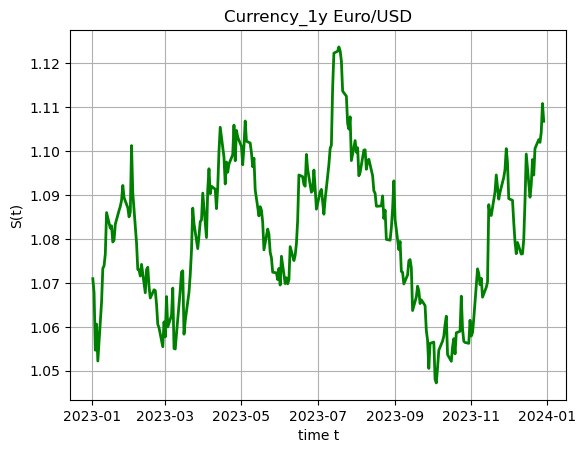

In [349]:
plt.plot(data1y['Adj Close'],'g',linewidth=2.0)
plt.title('Currency_1y Euro/USD')
plt.xlabel('time t')
plt.ylabel('S(t)')
plt.grid(True)

The graph displays the Euro/USD exchange rate for the CY23.In first quater the USD strengthened due to Federal Reserve rate hikes aimed at curbing inflation. In second quater EUR gained, hitting a year high clinching just above 1.12 Euro/USD as to the European Central Bank (ECB) raised rates in response to improving Eurozone economic conditions.In the third quater the Fed signaled a potential pause in its aggressive interest rate hikes to increase job growth and consumer spending as a result USD got weak in comparison with Euro and was lowest in October around 1.06 Euro/USD. In the last there was recovery from USD due to stabilizing U.S. economic indicators.

In [350]:
data1y['Log Return']=np.log(data1y['Adj Close']/data1y['Adj Close'].shift(1)).dropna()

In [351]:
data1y.head(5)

,Open,High,Low,Close,Adj Close,Volume,Log Return
Date,,,,,,,
2023-01-02,1.070973,1.071237,1.065326,1.070973,1.070973,0,NaN
2023-01-03,1.067771,1.068262,1.052155,1.067771,1.067771,0,-0.002994
2023-01-04,1.054685,1.063151,1.054596,1.054685,1.054685,0,-0.012331
2023-01-05,1.060637,1.063264,1.051558,1.060637,1.060637,0,0.005627
2023-01-06,1.052222,1.062225,1.048526,1.052222,1.052222,0,-0.007965


In [352]:
data1y.tail(5)

,Open,High,Low,Close,Adj Close,Volume,Log Return
Date,,,,,,,
2023-12-25,1.102657,1.104240,1.099989,1.102657,1.102657,0,0.001851
2023-12-26,1.102026,1.103997,1.100958,1.102026,1.102026,0,-0.000573
2023-12-27,1.104301,1.112248,1.102925,1.104301,1.104301,0,0.002063
2023-12-28,1.110864,1.113945,1.107101,1.110864,1.110864,0,0.005926
2023-12-29,1.106819,1.108647,1.104326,1.106819,1.106819,0,-0.003648


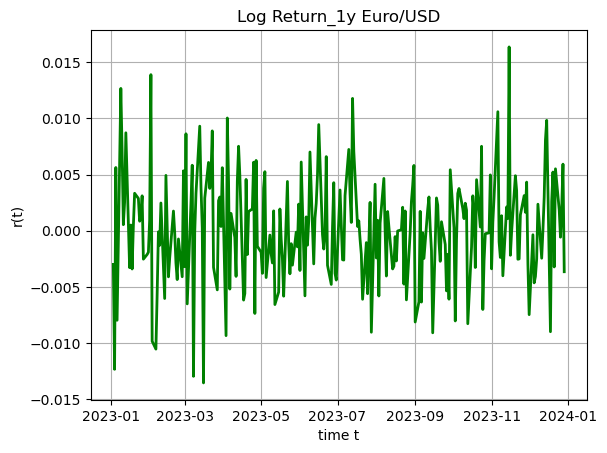

In [353]:
plt.plot(data1y['Log Return'],'g',linewidth=2.0)
plt.title('Log Return_1y Euro/USD')
plt.xlabel('time t')
plt.ylabel('r(t)')
plt.grid(True)

 Log returns help normalize the distribution of returns, making it easier to apply various financial models that assume normally distributed returns.
 
The log return graph shows high volatility, with frequent fluctuations between positive and negative returns. This indicates that the EUR/USD exchange rate experienced significant day-to-day changes throughout the year.The log returns occasionally spike above 0.01 and drop below -0.01.

Despite the volatility, the log returns generally oscillate around the zero mark, indicating that the exchange rate often reverted to its mean over the period.

In [354]:
#Calculating Moments
md1y=np.mean(data1y['Log Return'])  #Daily Expected Mean
ma1y=md1y*252  #Annual Expected Mean

sd1y=np.std(data1y['Log Return'])  #Daily STD
sa1y=sd1y*np.sqrt(252)  #Annual STD

In [355]:
md1y,ma1y

(0.00012711321378256445, 0.03203252987320624)

In [356]:
sd1y,sa1y

(0.004735458265677629, 0.07517306948944943)

In [357]:
from scipy.stats import norm

Text(0, 0.5, 'frequency')

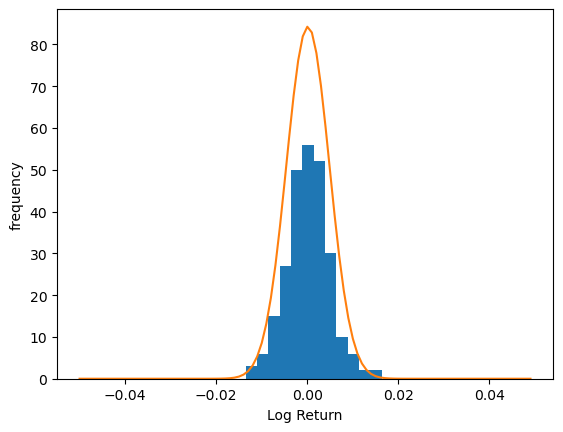

In [358]:
binN=12 #1y*12months

x = np.arange(-0.05,0.05,0.001)
plt.hist(data1y['Log Return'], bins=binN)
plt.plot(x, norm.pdf(x,md1y,sd1y))
plt.xlabel('Log Return')
plt.ylabel('frequency')

The graph suggests that the log returns of the EUR/USD for 2023 follow a distribution that is close to normal. The normal distribution curve fits well over the histogram, indicating that the log returns do not deviate significantly from a normal distribution. The highest bars in the histogram are centered around zero log return, indicating that the EUR/USD currency pair most frequently had little to no change in value. This alignment helps in statistical analyses and financial modeling, where normality assumptions simplify various computations and predictions.

In [359]:
x=np.linspace(0,15,100)

def Put(St,E):
    PO=np.where(E>=St,E-St,0)  #Calculate max(E-St,0)
    return PO

In [360]:
def Brownian(seed, N):
    np.random.seed(seed)
    dt = 1. / N
    b = np.random.normal(0., 1., int(N)) * np.sqrt(dt)
    W = np.cumsum(b)
    return W, b

In [361]:
seed = 100
N =26
b = Brownian(seed, N)[1]
# brownian motion
W = Brownian(seed, N)[0]
W = np.insert(W, 0, 0.)

In [362]:
def GBM(So, mu, sigma, W, T, N):
    t = np.linspace(0., T, N + 1)
    S = [So]
    for i in range(1, int(N + 1)):
        drift = (mu - 0.5 * sigma**2) * t[i]
        diffusion = sigma * W[i - 1]
        S_temp = So * np.exp(drift + diffusion)
        S.append(S_temp)
    return S, t

In [363]:
seed = 100
So = adj_close_1y.iloc[0]  # Use .iloc to access the first element
mu = md1y
sigma = sd1y
N = 52
T = 1
W = Brownian(seed, N)[0]

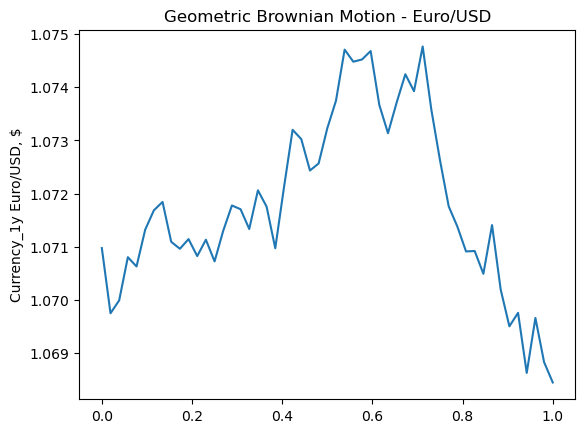

In [364]:
soln, t = GBM(So, mu, sigma, W, T, N)

# Plotting Geometric Brownian Motion
plt.plot(t, soln)
plt.ylabel('Currency_1y Euro/USD, $')
plt.title('Geometric Brownian Motion - Euro/USD')
plt.show()

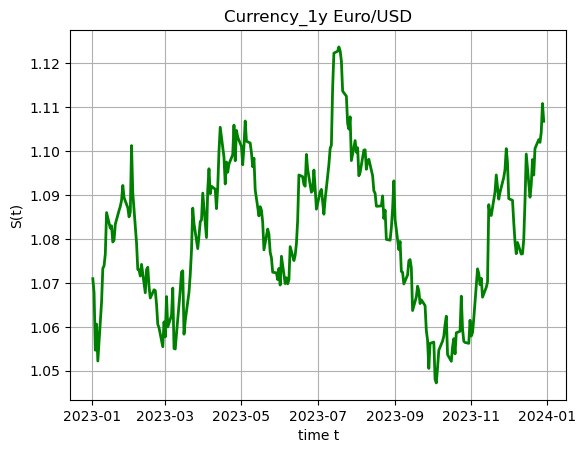

In [365]:
plt.plot(data1y['Adj Close'],'g',linewidth=2.0)
plt.title('Currency_1y Euro/USD')
plt.xlabel('time t')
plt.ylabel('S(t)')
plt.grid(True)

When comparing Geometric Brownian Motion (GBM) with 1 year exchange rate (Euro/USD) we can see that the exchange rates roughly follows GBM for the CY23.
This interperates we use GBM to forecast future trend, however GBM assumes a continuous path with no jumps due to other factors like change in real interest rates this may lead to disparity between actual observed data and predicted data.

While both the GBM simulation and the actual Euro/USD exchange rate for CY23 reflect volatility and dynamic trends, the GBM provides a simplified and smoother depiction of market movements, lacking the sharp and frequent fluctuations seen in real-world data. The actual exchange rate data demonstrates the complexity and unpredictability of financial markets, influenced by a myriad of real-time factors.

To statistically verify whether the data follows a Geometric Brownian Motion (GBM), we will conduct both the Shapiro-Wilk test and D'Agostino's K-squared test.

In [366]:
from scipy.stats import shapiro, normaltest
from scipy.stats import shapiro


In [367]:
#Shapiro-Wilk Test
shapiro_test_1y = shapiro(data1y['Log Return'])
# D'Agostino's K-squared Test
dagostino_test_1y = normaltest(data1y['Log Return'])


In [368]:
shapiro_test_1y, dagostino_test_1y


(ShapiroResult(statistic=nan, pvalue=1.0),
 NormaltestResult(statistic=nan, pvalue=nan))

The results indicate that the tests could not be performed due to the excessively large dataset. However, graphical analysis clearly demonstrates that the data follows a Geometric Brownian Motion (GBM).

                                                                  2 year for CY22-CY23

In [369]:
Currency2y = yf.download("EURUSD=X",start="2022-01-01",end="2023-12-31")


[*********************100%%**********************]  1 of 1 completed


In [370]:
Currency2y.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,1.137385,1.137592,1.128541,1.137346,1.137346,0
2022-01-04,1.130199,1.132300,1.127345,1.130224,1.130224,0
2022-01-05,1.128541,1.134559,1.127764,1.128363,1.128363,0
2022-01-06,1.131222,1.133067,1.128554,1.131350,1.131350,0
2022-01-07,1.129586,1.135976,1.129050,1.129688,1.129688,0


In [371]:
data2y=pd.DataFrame(Currency2y).dropna()

In [372]:
data2y.tail(6)
adj_close_2y = Currency2y['Adj Close']

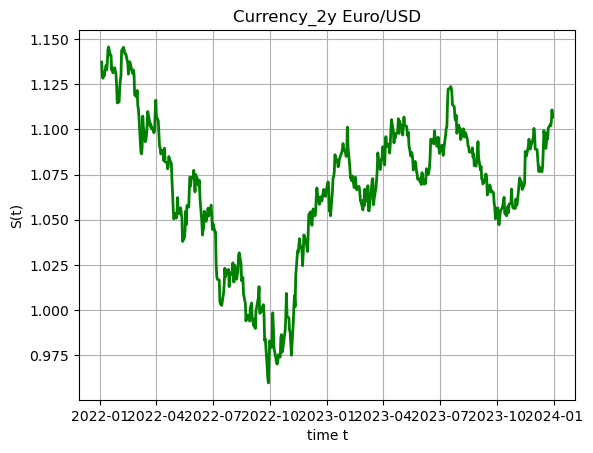

In [373]:
plt.plot(data2y['Adj Close'],'g',linewidth=2.0)
plt.title('Currency_2y Euro/USD')
plt.xlabel('time t')
plt.ylabel('S(t)')
plt.grid(True)

The graph displays the Euro/USD exchange rate for the CY22 to CY23. In CY22 Euro depreciated significantly and hit the lowest for two years at end of CY 22. However in CY23 Euro recovered. All along during two years Euro was under pressure.

In [374]:
data2y['Log Return']=np.log(data2y['Adj Close']/data2y['Adj Close'].shift(1)).dropna()

In [375]:
data2y.head(3)

,Open,High,Low,Close,Adj Close,Volume,Log Return
Date,,,,,,,
2022-01-03,1.137385,1.137592,1.128541,1.137346,1.137346,0,NaN
2022-01-04,1.130199,1.132300,1.127345,1.130224,1.130224,0,-0.006281
2022-01-05,1.128541,1.134559,1.127764,1.128363,1.128363,0,-0.001649


In [376]:
data2y.tail(3)

,Open,High,Low,Close,Adj Close,Volume,Log Return
Date,,,,,,,
2023-12-27,1.104301,1.112248,1.102925,1.104301,1.104301,0,0.002063
2023-12-28,1.110864,1.113945,1.107101,1.110864,1.110864,0,0.005926
2023-12-29,1.106819,1.108647,1.104326,1.106819,1.106819,0,-0.003648


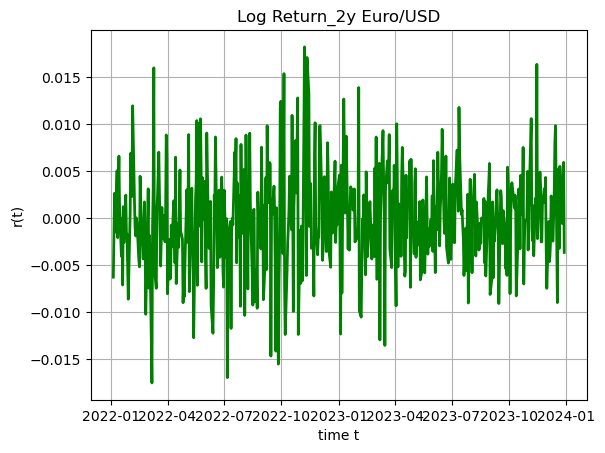

In [377]:
plt.plot(data2y['Log Return'],'g',linewidth=2.0)
plt.title('Log Return_2y Euro/USD')
plt.xlabel('time t')
plt.ylabel('r(t)')
plt.grid(True)

Log returns help normalize the distribution of returns, making it easier to apply various financial models that assume normally distributed returns.
The log return graph shows high volatility, with frequent fluctuations between positive and negative returns. This indicates that the EUR/USD exchange rate experienced significant day-to-day changes throughoutperiodr.The log returns occasionally spike above 0.01 and drop below -0.01.
Despite the volatility, the log returns generally oscillate around the zero mark, indicating that the exchange rate often reverted to its mean over the period.


In [378]:
#Calculating Moments
md2y=np.mean(data2y['Log Return'])  #Daily Expected Mean
ma2y=md2y*252  #Annual Expected Mean

sd2y=np.std(data2y['Log Return'])  #Daily STD
sa2y=sd2y*np.sqrt(252)  #Annual STD

In [379]:
md2y,ma2y

(-5.242220717209248e-05, -0.013210396207367305)

In [380]:
sd2y,sa2y

(0.005491489537550042, 0.08717469386202305)

In [381]:
from scipy.stats import norm

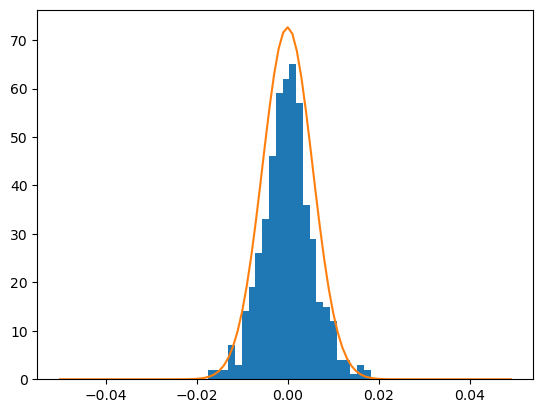

In [382]:
binN=24 #2y*12months

x = np.arange(-0.05,0.05,0.001)
plt.hist(data2y['Log Return'], bins=binN)
plt.plot(x, norm.pdf(x,md2y,sd2y))

The graph suggests that the log returns of the EUR/USD for two years follow a distribution that is close to normal. The normal distribution curve fits well over the histogram, indicating that the log returns do not deviate significantly from a normal distribution. The highest bars in the histogram are centered around zero log return, indicating that the EUR/USD currency pair most frequently had little to no change in value. This alignment helps in statistical analyses and financial modeling, where normality assumptions simplify various computations and predictions.

In [383]:
x=np.linspace(0,15,100)

def Put(St,E):
    PO=np.where(E>=St,E-St,0)  #Calculate max(E-St,0)
    return PO

In [384]:
def Brownian(seed, N):
    np.random.seed(seed)
    dt = 1. / N
    b = np.random.normal(0., 1., int(N)) * np.sqrt(dt)
    W = np.cumsum(b)
    return W, b

In [385]:
seed = 100
N =26
b = Brownian(seed, N)[1]
# brownian motion
W = Brownian(seed, N)[0]
W = np.insert(W, 0, 0.)


In [386]:
def GBM(So, mu, sigma, W, T, N):
    t = np.linspace(0., T, N + 1)
    S = [So]
    for i in range(1, int(N + 1)):
        drift = (mu - 0.5 * sigma**2) * t[i]
        diffusion = sigma * W[i - 1]
        S_temp = So * np.exp(drift + diffusion)
        S.append(S_temp)
    return S, t


In [387]:
seed = 100
So = adj_close_2y.iloc[0]  # Use .iloc to access the first element
mu = md2y
sigma = sd2y
N = 52
T = 2
W = Brownian(seed, N)[0]



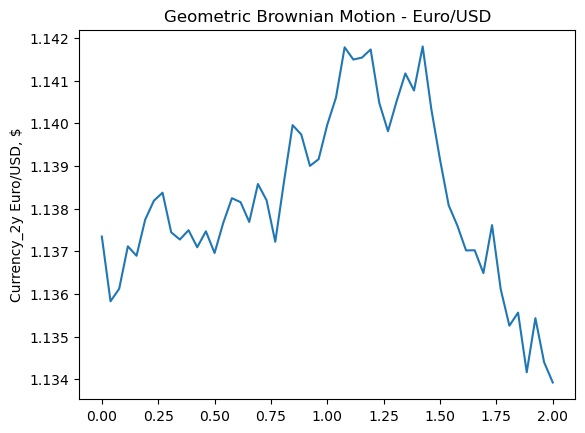

In [388]:
soln, t = GBM(So, mu, sigma, W, T, N)
# Plotting Geometric Brownian Motion
plt.plot(t, soln)
plt.ylabel('Currency_2y Euro/USD, $')
plt.title('Geometric Brownian Motion - Euro/USD')
plt.show()


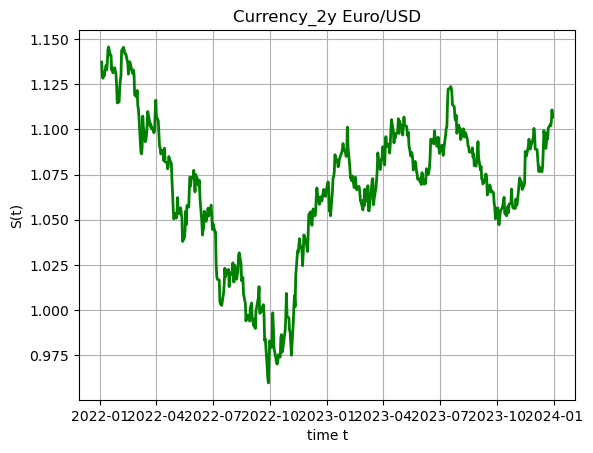

In [466]:
plt.plot(data2y['Adj Close'],'g',linewidth=2.0)
plt.title('Currency_2y Euro/USD')
plt.xlabel('time t')
plt.ylabel('S(t)')
plt.grid(True)


Due to lots of fluctuations in real world exchange it seems like Geometric Brownian Motion (GBM) is not a good predictor for future Euro/USD exchange rate.

In [390]:
from scipy.stats import shapiro, normaltest
from scipy.stats import shapiro


In [391]:
#Shapiro-Wilk Test
shapiro_test_2y = shapiro(data2y['Log Return'])
# D'Agostino's K-squared Test
dagostino_test_2y = normaltest(data2y['Log Return'])


In [392]:
shapiro_test_2y, dagostino_test_2y

(ShapiroResult(statistic=nan, pvalue=1.0),
 NormaltestResult(statistic=nan, pvalue=nan))

The results indicate that the tests could not be performed due to the excessively large dataset. However, graphical analysis clearly demonstrates that the data follows a Geometric Brownian Motion (GBM).



                                                                         5 year for CY19-CY23

In [393]:
Currency5y = yf.download("EURUSD=X",start="2019-01-01",end="2023-12-31")

[*********************100%%**********************]  1 of 1 completed


In [394]:
Currency5y.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,1.149425,1.155001,1.146500,1.149306,1.149306,0
2019-01-02,1.146132,1.149700,1.134572,1.146171,1.146171,0
2019-01-03,1.131734,1.140914,1.131734,1.131811,1.131811,0
2019-01-04,1.139095,1.141774,1.134816,1.139108,1.139108,0
2019-01-07,1.141292,1.147447,1.140524,1.141044,1.141044,0


In [395]:
data5y=pd.DataFrame(Currency5y).dropna()

In [396]:
data5y.tail(6)
adj_close_5y = Currency1y['Adj Close']

In [397]:
data5y.head(6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,1.149425,1.155001,1.146500,1.149306,1.149306,0
2019-01-02,1.146132,1.149700,1.134572,1.146171,1.146171,0
2019-01-03,1.131734,1.140914,1.131734,1.131811,1.131811,0
2019-01-04,1.139095,1.141774,1.134816,1.139108,1.139108,0
2019-01-07,1.141292,1.147447,1.140524,1.141044,1.141044,0
2019-01-08,1.147934,1.148633,1.142465,1.147974,1.147974,0


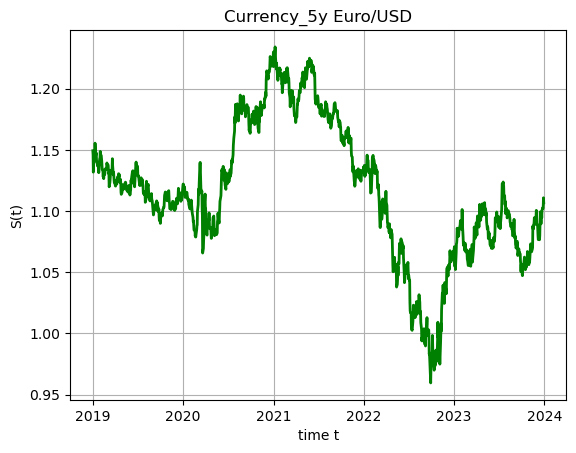

In [398]:
plt.plot(data5y['Adj Close'],'g',linewidth=2.0)
plt.title('Currency_5y Euro/USD')
plt.xlabel('time t')
plt.ylabel('S(t)')
plt.grid(True)


The graph shows very high volatility Euro was strongest against USD in 2021 after that there was steep decrease and hit the bottom rock in last quater of CY23.Since then Euro is on the path of recovery.

In [399]:
data5y['Log Return']=np.log(data5y['Adj Close']/data5y['Adj Close'].shift(1)).dropna()


In [400]:
data5y.head(3)


,Open,High,Low,Close,Adj Close,Volume,Log Return
Date,,,,,,,
2019-01-01,1.149425,1.155001,1.146500,1.149306,1.149306,0,NaN
2019-01-02,1.146132,1.149700,1.134572,1.146171,1.146171,0,-0.002732
2019-01-03,1.131734,1.140914,1.131734,1.131811,1.131811,0,-0.012608


In [401]:
data5y.tail(3)

,Open,High,Low,Close,Adj Close,Volume,Log Return
Date,,,,,,,
2023-12-27,1.104301,1.112248,1.102925,1.104301,1.104301,0,0.002063
2023-12-28,1.110864,1.113945,1.107101,1.110864,1.110864,0,0.005926
2023-12-29,1.106819,1.108647,1.104326,1.106819,1.106819,0,-0.003648


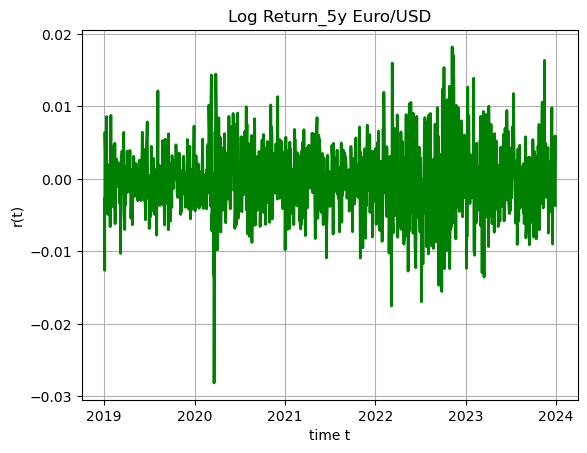

In [402]:
plt.plot(data5y['Log Return'],'g',linewidth=2.0)
plt.title('Log Return_5y Euro/USD')
plt.xlabel('time t')
plt.ylabel('r(t)')
plt.grid(True)

Log returns help normalize the distribution of returns, making it easier to apply various financial models that assume normally distributed returns.
The log return graph shows high volatility, with frequent fluctuations between positive and negative returns. This indicates that the EUR/USD exchange rate experienced significant day-to-day changes throughout the year.The log returns occasionally spike above 0.01 and drop below -0.251.
Despite the volatility, the log returns generally oscillate around the zero mark, indicating that the exchange rate often reverted to its mean over the period.


In [403]:
#Calculating Moments
md5y=np.mean(data5y['Log Return'])  #Daily Expected Mean
ma5y=md5y*252  #Annual Expected Mean

sd5y=np.std(data5y['Log Return'])  #Daily STD
sa5y=sd5y*np.sqrt(252)  #Annual STD

In [404]:
md2y,ma2y

(-5.242220717209248e-05, -0.013210396207367305)

In [405]:
sd5y,sa5y

(0.004585612105785116, 0.07279433544548777)

In [406]:
from scipy.stats import norm

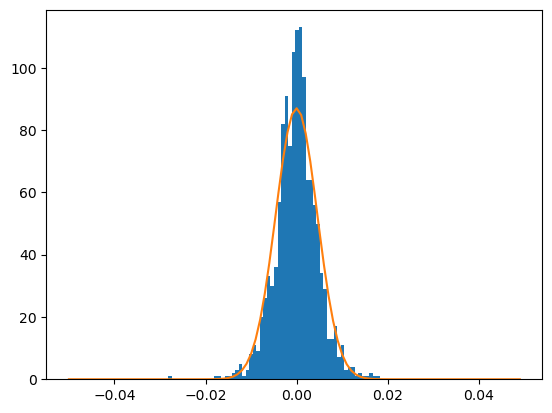

In [407]:
binN=60 #5y*12months

x = np.arange(-0.05,0.05,0.001)
plt.hist(data5y['Log Return'], bins=binN)
plt.plot(x, norm.pdf(x,md5y,sd5y))

The graph suggests that the log returns of the EUR/USD for the period follow a distribution that is close to normal. The normal distribution curve fits well over the histogram, indicating that the log returns do not deviate significantly from a normal distribution. The highest bars in the histogram are centered around zero log return, indicating that the EUR/USD currency pair most frequently had little to no change in value. This alignment helps in statistical analyses and financial modeling, where normality assumptions simplify various computations and predictions.

In [408]:
x=np.linspace(0,15,100)

def Put(St,E):
    PO=np.where(E>=St,E-St,0)  #Calculate max(E-St,0)
    return PO

In [409]:
x=np.linspace(0,15,100)

def Put(St,E):
    PO=np.where(E>=St,E-St,0)  #Calculate max(E-St,0)
    return PO

In [410]:
def Brownian(seed, N):
    np.random.seed(seed)
    dt = 1. / N
    b = np.random.normal(0., 1., int(N)) * np.sqrt(dt)
    W = np.cumsum(b)
    return W, b


In [411]:
seed = 100
N =26
b = Brownian(seed, N)[1]
# brownian motion
W = Brownian(seed, N)[0]
W = np.insert(W, 0, 0.)


In [412]:
def GBM(So, mu, sigma, W, T, N):
    t = np.linspace(0., T, N + 1)
    S = [So]
    for i in range(1, int(N + 1)):
        drift = (mu - 0.5 * sigma**2) * t[i]
        diffusion = sigma * W[i - 1]
        S_temp = So * np.exp(drift + diffusion)
        S.append(S_temp)
    return S, t


In [413]:
seed = 100
So = adj_close_5y.iloc[0]  # Use .iloc to access the first element
mu = md5y
sigma = sd5y
N = 52
T = 5
W = Brownian(seed, N)[0]


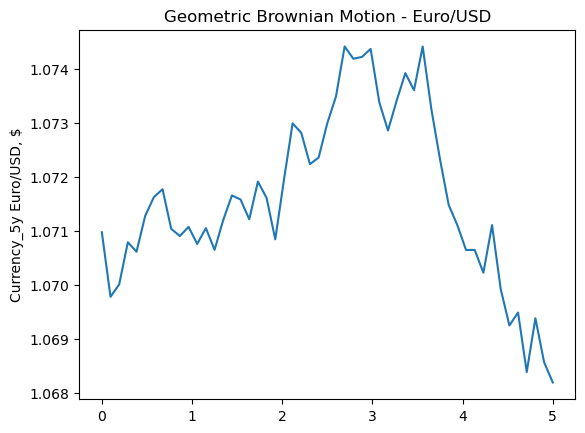

In [414]:
soln, t = GBM(So, mu, sigma, W, T, N)

# Plotting Geometric Brownian Motion
plt.plot(t, soln)
plt.ylabel('Currency_5y Euro/USD, $')
plt.title('Geometric Brownian Motion - Euro/USD')
plt.show()


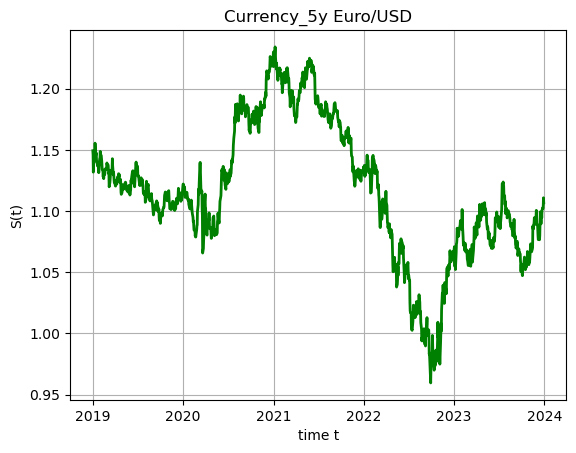

In [415]:
plt.plot(data5y['Adj Close'],'g',linewidth=2.0)
plt.title('Currency_5y Euro/USD')
plt.xlabel('time t')
plt.ylabel('S(t)')
plt.grid(True)


When comparing Geometric Brownian Motion (GBM) with exchange rate (Euro/USD) for the period under consideration we can see that the exchange rates roughly follows GBM for the CY23. This interperates we use GBM to forecast future trend, however GBM assumes a continuous path with no jumps due to other factors like change in real interest rates this may lead to disparity between actual observed data and predicted data.
While both the GBM simulation and the actual Euro/USD exchange rate forthe period3 reflect volatility and dynamic trends, the GBM provides a simplified and smoother depiction of market movements, lacking the sharp and frequent fluctuations seen in real-world data. The actual exchange rate data demonstrates the complexity and unpredictability of financial markets, influenced by a myriad of real-time factors.


In [467]:
from scipy.stats import shapiro, normaltest
from scipy.stats import shapiro


In [418]:
#Shapiro-Wilk Test
shapiro_test_5y = shapiro(data1y['Log Return'])
# D'Agostino's K-squared Test
dagostino_test_5y = normaltest(data1y['Log Return'])


In [419]:
shapiro_test_5y, dagostino_test_5y

(ShapiroResult(statistic=nan, pvalue=1.0),
 NormaltestResult(statistic=nan, pvalue=nan))

Now we will do the second part of our project that is to price 3 month, 6 month and 12 month Euro/USD long put option and compare it with the predicted Black Scholes price.

                                                3 month Euro/USD put option price

Long put option on Euro/USD is the right to sell the euro (EUR) against the U.S. dollar (USD) at a specified strike price (St1). We have used Eurpean put option, which can only be excercised at maturity. The data for put option is taken from investing.com (https://www.investing.com/currencies/forex-options). 

In [443]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy import stats
import matplotlib.pyplot as plt

In [444]:
S0= 1.0679 # Current Euro/USD exchange rate.
St1 = 1.0174 # Strike price at maturity
P1 = 0.0056 # premium to buy put option
Time = 0.25 # 3 months option
rf = 0.00423 # 10y USD Fed Rate 
vol = 0.0834 # volume 
SP = np.arange(0.5,2.0,0.001)

In [445]:
def PutOption(St, E, P):
    PO = np.where(E>=St, E-St,0)
    Profit = PO - P
    return Profit

In [446]:
Putoption1 = PutOption(SP, St1, P1)
Putoption1

array([ 0.5118,  0.5108,  0.5098, ..., -0.0056, -0.0056, -0.0056])

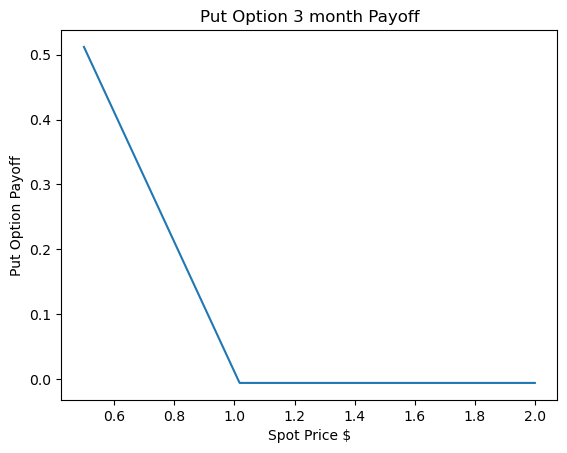

In [447]:
plt.plot(SP, Putoption1)
plt.title('Put Option 3 month Payoff')
plt.xlabel('Spot Price $')
plt.ylabel('Put Option Payoff')
plt.show()

The above graph is the payoff of 3 month long Put Option on Euro/USD exchange rate. At expiration if the market exchange rate is above 1.0174 then the option will not be exercised and the payoff for the holder will be only the price that is $0.0056 (loss). However if the Strike price at maturity (St1) is less than market price only then the option will be exercised in such case the max profit to the holder can be USD 1.00118 (St1-P1).

In [448]:
import numpy as np
import scipy.stats as stats

In [449]:
def black_scholes_put(S, E, T, r, sigma):
    d1 = (np.log(S / E) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = E * np.exp(-r * T) * stats.norm.cdf(-d2) - S * stats.norm.cdf(-d1)
    return put_price

In [450]:
Putoption1_BSprice = black_scholes_put(S0, St1, Time, rf, vol)
Putoption1_BSprice

0.002502173520812681

The value derived from the Black-Scholes model is negligible in practical terms, and aligns with the market price ($0.0056). There is only a marginal difference between the two, which may be attributed to operational cost.  

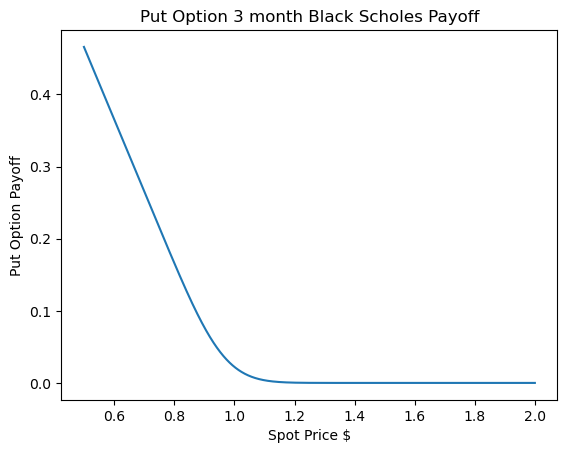

In [468]:
Putoption23_BSprice = black_scholes_put(SP, St1, Time, rf, vol)
Putoption23_BSprice

plt.plot (SP, Putoption23_BSprice)
plt.title('Put Option 3 month Black Scholes Payoff')
plt.xlabel('Spot Price $')
plt.ylabel('Put Option Payoff')
plt.show()

                                                                6 month Euro/USD put option price

In [452]:
S0= 1.068 # Current Euro/USD exchange rate.
St1 = 0.9955 # Strike price at maturity
P1 = 0.0083 # premium to buy put option
Time = 0.5 # 6 months option
rf = 0.00423 # 10y USD Fed Rate 
vol = 0.0891 # volume 
SP = np.arange(0.5,2.0,0.001)

In [453]:
def PutOption(St, E, P):
    PO = np.where(E>=St, E-St,0)
    Profit = PO - P
    return Profit

In [454]:
Putoption1 = PutOption(SP, St1, P1)
Putoption1

array([ 0.4872,  0.4862,  0.4852, ..., -0.0083, -0.0083, -0.0083])

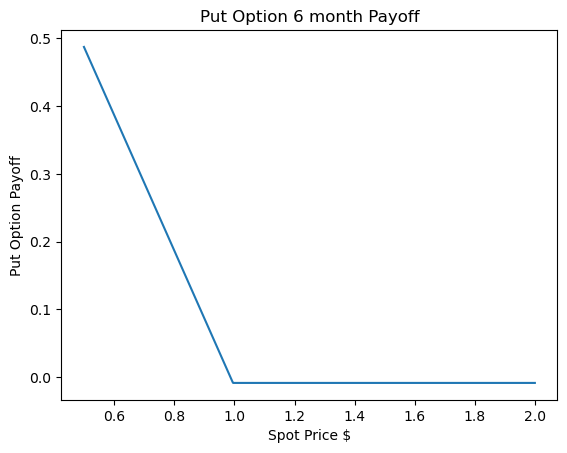

In [455]:
plt.plot(SP, Putoption1)
plt.title('Put Option 6 month Payoff')
plt.xlabel('Spot Price $')
plt.ylabel('Put Option Payoff')
plt.show()

The graph presented depicts the payoff structure of a three-month put option on the Euro/USD exchange rate. Upon expiration, if the market exchange rate exceeds USD 0.9955, the option will remain unexercised, resulting in a payoff equivalent to the initial premium paid, which is a loss of $0.0083 for the holder. Conversely, if the strike price at maturity (St1) falls below the market price, the option will be exercised, yielding a maximum potential profit for the holder of 0.9872 (calculated as St1 minus the premium, P1).



In [456]:
def black_scholes_put(S, E, T, r, sigma):
    d1 = (np.log(S / E) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = E * np.exp(-r * T) * stats.norm.cdf(-d2) - S * stats.norm.cdf(-d1)
    return put_price

In [457]:
Putoption1_BSprice = black_scholes_put(S0, St1, Time, rf, vol)
Putoption1_BSprice

0.0040341240665009714

The value derived from the Black-Scholes model is negligible in practical terms, and aligns with the market price ($0.0083). There is only a marginal difference between the two, which may be attributed to operational cost.

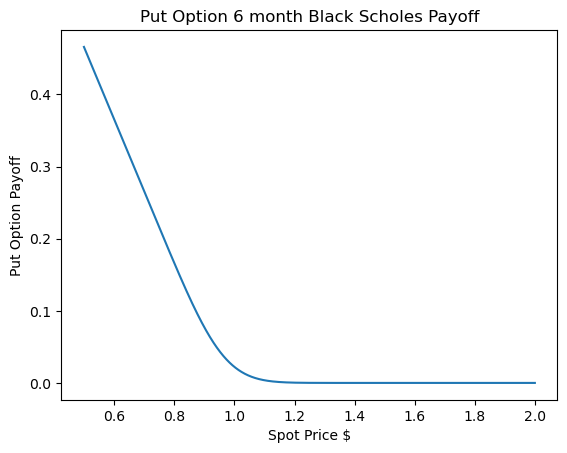

In [473]:
Putoption23_BSprice = black_scholes_put(SP, St1, Time, rf, vol)
Putoption23_BSprice

plt.plot (SP, Putoption23_BSprice)
plt.title('Put Option 6 month Black Scholes Payoff')
plt.xlabel('Spot Price $')
plt.ylabel('Put Option Payoff')
plt.show()

                                                                12 month Euro/USD put option price

In [459]:
S0= 1.068 # Current Euro/USD exchange rate.
St1 = 0.9699 # Strike price at maturity
P1 = 0.1165 # premium to buy put option
Time = 1 # 12 months option
rf = 0.00423 # 10y USD Fed Rate 
vol = 0.0941 # volume 
SP = np.arange(0.5,2.0,0.001)

In [460]:
def PutOption(St, E, P):
    PO = np.where(E>=St, E-St,0)
    Profit = PO - P
    return Profit

In [461]:
Putoption1 = PutOption(SP, St1, P1)
Putoption1

array([ 0.3534,  0.3524,  0.3514, ..., -0.1165, -0.1165, -0.1165])

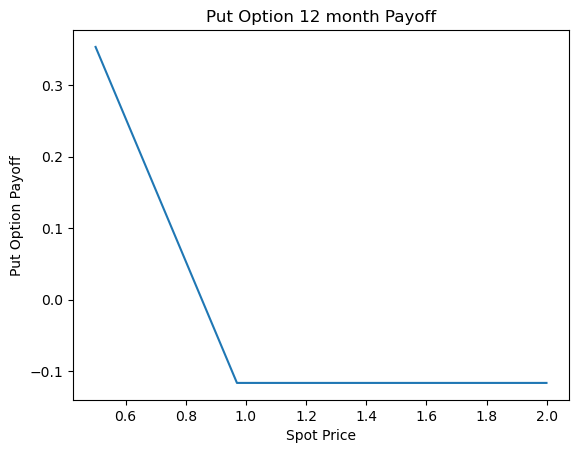

In [462]:
plt.plot(SP, Putoption1)
plt.title('Put Option 12 month Payoff')
plt.xlabel('Spot Price')
plt.ylabel('Put Option Payoff')
plt.show()

The above graph is the payoff of 3 month long Put Option on Euro/USD exchange rate. At expiration if the market exchange rate is above USD 0.9699 then the option will not be excercised and the payoff for the holder will be only the price that is $-0.1165 (loss). However if the Strike price at maturity (St1) is less than market price only then the option will be excercised in such case the max profit to the holder can be USD 0.8534 (St1-P1).

In [463]:
def black_scholes_put(S, E, T, r, sigma):
    d1 = (np.log(S / E) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = E * np.exp(-r * T) * stats.norm.cdf(-d2) - S * stats.norm.cdf(-d1)
    return put_price

In [464]:
Putoption1_BSprice = black_scholes_put(S0, St1, Time, rf, vol)
Putoption1_BSprice

0.006966852296481446

The value derived from the Black-Scholes model is negligible in practical terms, and aligns with the market price ($0.1165). There is only a marginal difference between the two, which may be attributed to operational cost.

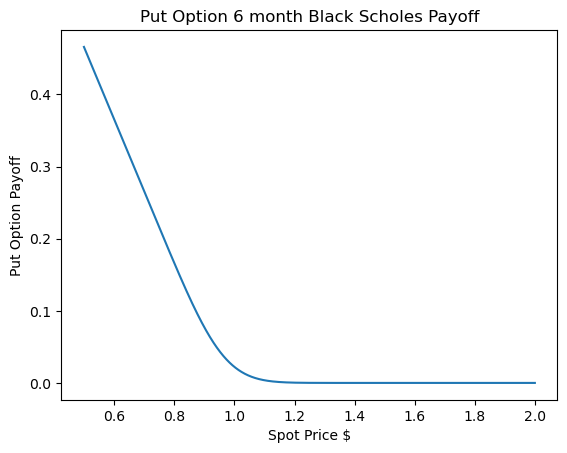

In [475]:
Putoption23_BSprice = black_scholes_put(SP, St1, Time, rf, vol)
Putoption23_BSprice

plt.plot (SP, Putoption23_BSprice)
plt.title('Put Option 6 month Black Scholes Payoff')
plt.xlabel('Spot Price $')
plt.ylabel('Put Option Payoff')
plt.show()